## ei_runner.ipynb 
A basic script to run excitatory-inhibitory (EI) networks using the `ei_net` class imported from ei_net.py .  
By Sergio Verduzco  
December 2017

In [1]:
# importing libraries
%cd ..
from ei_net import *

/home/z/projects/draculab


In [2]:
# This is the name of the file where logging will happen
log_file = "./logs/ei_net_log" + time.strftime("_%m-%d-%y.txt")

In [3]:
%%capture capt 
# logging draculab version used for this session
print('#======================================================')
print('#             | Latest git commit: |')
print('#====================================================== \n#', end=' ')
!git log -1 --oneline --color=never

In [12]:
# Write the output of the cell above in the simulation log
f = open(log_file, mode='a')
f.write(capt.stdout)
f.close()

In [2]:
# Creating input patterns
n_pat = 4  # number of input patterns
pat_arr = np.zeros((4, 25)) # ei_runner.n['x'])) # array with all input patterns

for row in range(5):
    for col in range(5):
        idx = 5*col + row
        if row == col or row+col == 4: # The X input pattern
            pat_arr[0,idx] = 1
        if row == 2 or col == 2:  # The + input pattern
            pat_arr[1,idx] = 1
        if row == 1 or row == 3:  # The = input pattern
            pat_arr[2,idx] = 1
        if col == 1 or col == 3:  # The || input pattern
            pat_arr[3,idx] = 1
pat_arr = pat_arr / 5.

def inp_pat(pres, rows, columns, random=True):
    # The function that creates the input pattern shown at each presentation in ei_net.run
    if random:
        idx = np.random.randint(4)
    else:
        idx = pres % 4
    return pat_arr[idx, :]
#for i in range(6):
#    print(np.reshape(inp_pat(5, 4, 2),(5,5)))

In [3]:
# Setting parameters
ei_runner = ei_net()
#----------------------------------
ei_runner.annotate("Adjusting size of e,i groups.")
ei_runner.set_param('e_geom', 'rows', 16)
ei_runner.set_param('e_geom', 'columns', 16)
ei_runner.set_param('i_geom', 'rows', 8)
ei_runner.set_param('i_geom', 'columns', 8)
ei_runner.annotate("Compensating for the ratio of excitatory to inhibitory units.")
ei_runner.set_param('ee_conn', 'weights',{'uniform' : {'low': .01, 'high' : 0.3}})
ei_runner.set_param('ei_conn', 'weights',{'uniform' : {'low': .01, 'high' : 0.3}})
ei_runner.set_param('ie_conn', 'weights',{'uniform' : {'low': -1.2, 'high' : -0.01}})
ei_runner.set_param('ii_conn', 'weights',{'uniform' : {'low': -1., 'high' : -0.01}})
#----------------------------------
ei_runner.annotate("Setting input parameters")
ei_runner.set_param('x_geom', 'rows', 5) 
ei_runner.set_param('x_geom', 'columns', 5) 
ei_runner.set_param('xe_conn', 'weights', {'uniform' : {'low': 0.05, 'high' : 4.}})
ei_runner.set_param('xi_conn', 'weights', {'uniform' : {'low': 0.05, 'high' : 4.}})
ei_runner.set_param('xe_conn', 'mask', {'circular': {'radius': .3}})
ei_runner.set_param('xi_conn', 'mask', {'circular': {'radius': .3}})
#----------------------------------
ei_runner.annotate("Using Oja input synapses")
ei_runner.set_param('xe_syn', 'type', synapse_types.oja)
ei_runner.set_param('xe_syn', 'lrate', 1./100.)
ei_runner.set_param('xi_syn', 'type', synapse_types.oja)
ei_runner.set_param('xi_syn', 'lrate', 1./100.)
#----------------------------------
ei_runner.annotate("Using BCM EE synapses")
ei_runner.set_param('ee_syn', 'type', synapse_types.bcm)
ei_runner.set_param('ee_syn', 'lrate', 1./100.)
#ei_runner.set_param('ee_syn', 'omega', 2.)
#----------------------------------
ei_runner.annotate("Using corr_homeo_inhib IE synapses")
ei_runner.set_param('ie_syn', 'type', synapse_types.corr_inh)
ei_runner.set_param('ie_syn', 'lrate', 1./50.)
ei_runner.set_param('e_pars', 'des_act', 0.4)
#----------------------------------
ei_runner.annotate("Using anti_cov_pre EI synapses")
ei_runner.set_param('ei_syn', 'type', synapse_types.anticov_pre)
ei_runner.set_param('ei_syn', 'lrate', .01)
#----------------------------------
"""
ei_runner.annotate('Using exp_rate_dist ee synapses.')
ei_runner.set_param('ee_syn', 'type', synapse_types.exp_rate_dist)
ei_runner.set_param('ee_syn', 'lrate', 1.)
ei_runner.set_param('ee_syn', 'wshift', 10.)
ei_runner.set_param('ee_syn', 'c', 2.)
"""
#----------------------------------

ei_runner.annotate("Using exp_dist_sig units for the excitatory population.")
ei_runner.set_param('e_pars', 'type', unit_types.exp_dist_sig)
ei_runner.set_param('e_pars', 'tau_scale', 0.001)
ei_runner.set_param('e_pars', 'c', 3.)
ei_runner.set_param('e_pars', 'Kp', .02)
"""
ei_runner.annotate("Using exp_dist_sig units for the inhibitory population.")
ei_runner.set_param('i_pars', 'type', unit_types.exp_dist_sig)
ei_runner.set_param('i_pars', 'tau_scale', 0.001)
ei_runner.set_param('i_pars', 'c', 3.)
ei_runner.set_param('i_pars', 'Kp', .02)
"""
#----------------------------------
"""
ei_runner.annotate("Using exp_dist_sig_thr units for the excitatory population.")
ei_runner.set_param('e_pars', 'type', unit_types.exp_dist_sig_thr)
ei_runner.set_param('e_pars', 'tau_thr', 0.005)
ei_runner.set_param('e_pars', 'c', 3.)

ei_runner.annotate("Using exp_dist_sig_thr units for the inhibitory population.")
ei_runner.set_param('i_pars', 'type', unit_types.exp_dist_sig_thr)
ei_runner.set_param('i_pars', 'tau_thr', 0.001)
ei_runner.set_param('i_pars', 'c', 3.)
"""
#----------------------------------
ei_runner.set_param('n', 'w_track', 16)
#----------------------------------
ei_runner.build()

In [4]:
# Simulating
n_pres = 1
pres_time = 1.
#ei_runner.run(n_pres, pres_time, set_inp_pat=inp_pat)
import cProfile
import pstats

cProfile.run('ei_runner.run(n_pres, pres_time, set_inp_pat=inp_pat)', 'restats')
prof = pstats.Stats('restats')
prof.sort_stats('cumulative').print_stats(40)
"""
Total execution time is 96.42239809036255 seconds
Thu Nov  1 14:19:07 2018    restats

         162973877 function calls (162725677 primitive calls) in 96.423 seconds
"""

Presentation 0 took 93.88213348388672 seconds.
Total execution time is 93.88291430473328 seconds
Thu Nov  1 15:46:37 2018    restats

         162522764 function calls (162274564 primitive calls) in 93.883 seconds

   Ordered by: cumulative time
   List reduced from 94 to 40 due to restriction <40>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000   93.883   93.883 {built-in method builtins.exec}
        1    0.000    0.000   93.883   93.883 <string>:1(<module>)
        1    0.000    0.000   93.883   93.883 /home/z/projects/draculab/ei_net.py:452(run)
        1    0.085    0.085   93.802   93.802 /home/z/projects/draculab/network.py:681(run)
    64000    1.823    0.000   93.567    0.001 /home/z/projects/draculab/units.py:226(update)
    64000    0.182    0.000   62.433    0.001 /home/z/.local/lib/python3.5/site-packages/scipy/integrate/odepack.py:26(odeint)
    64000    0.944    0.000   62.004    0.001 {built-in method scipy.integrate.

'\nTotal execution time is 96.42239809036255 seconds\nThu Nov  1 14:19:07 2018    restats\n\n         162973877 function calls (162725677 primitive calls) in 96.423 seconds\n'

In [1]:
prof.sort_stats('cumulative').print_stats(50)
ei_runner.net.units[ei_runner.e[0]].functions

Presentation 0 took 109.58671164512634 seconds.
Total execution time is 109.58747673034668 seconds
Thu Nov  1 14:47:56 2018    restats

         162998047 function calls (162749847 primitive calls) in 109.588 seconds

   Ordered by: cumulative time
   List reduced from 94 to 40 due to restriction <40>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000  109.588  109.588 {built-in method builtins.exec}
        1    0.000    0.000  109.588  109.588 <string>:1(<module>)
        1    0.000    0.000  109.588  109.588 /home/z/projects/draculab/ei_net.py:452(run)
        1    0.082    0.082  109.473  109.473 /home/z/projects/draculab/network.py:681(run)
    64000    1.620    0.000  109.239    0.002 /home/z/projects/draculab/units.py:226(update)
    64000    0.185    0.000   78.296    0.001 /home/z/.local/lib/python3.5/site-packages/scipy/integrate/odepack.py:26(odeint)
    64000    0.977    0.000   77.855    0.001 {built-in method scipy.integrate._odepack.odeint}
   506640    0.897    0.000   69.879    0.000 /home/z/projects/draculab/units.py:193(get_exp_sc_input_sum)
   506640   34.036    0.000   67.226    0.000 /home/z/projects/draculab/units.py:204(<listcomp>)
   455440    0.416    0.000   65.688    0.000 /home/z/projects/draculab/custom_units.py:366(derivatives)
 54919664   14.303    0.000   33.077    0.000 /home/z/projects/draculab/units.py:309(get_act)
 54919664   18.774    0.000   18.774    0.000 {cython_utils.cython_get_act3}
    75400    0.274    0.000   16.391    0.000 /home/z/projects/draculab/units.py:694(pre_syn_update)
   111191    0.099    0.000   11.191    0.000 /home/z/projects/draculab/units.py:1250(derivatives)
  4714598    3.600    0.000   11.079    0.000 /home/z/projects/draculab/ei_net.py:437(<lambda>)
   111191    0.169    0.000   10.928    0.000 /home/z/projects/draculab/units.py:149(get_input_sum)
   111191    3.062    0.000   10.388    0.000 /home/z/projects/draculab/units.py:156(<listcomp>)
    51200    1.686    0.000    8.118    0.000 /home/z/projects/draculab/units.py:848(upd_exp_scale)
  9429196    7.479    0.000    7.479    0.000 /home/z/projects/draculab/ei_net.py:425(H)
  3319200    3.585    0.000    6.170    0.000 /home/z/projects/draculab/synapses.py:534(update)
    51200    0.114    0.000    4.603    0.000 /home/z/projects/draculab/requirements.py:260(update)
496400/248200    3.080    0.000    4.316    0.000 /home/z/.local/lib/python3.5/site-packages/numpy/core/numeric.py:1318(roll)
    51200    0.920    0.000    4.294    0.000 /home/z/projects/draculab/requirements.py:261(<listcomp>)
 10908800    2.517    0.000    4.207    0.000 /home/z/projects/draculab/units.py:703(get_lpf_fast)
   617831    2.127    0.000    2.127    0.000 {built-in method builtins.sum}
   841800    1.054    0.000    2.056    0.000 /home/z/projects/draculab/synapses.py:308(update)
 10908800    1.690    0.000    1.690    0.000 /home/z/projects/draculab/requirements.py:77(get)
   843000    0.868    0.000    1.502    0.000 /home/z/projects/draculab/synapses.py:717(update)
    69000    0.219    0.000    1.407    0.000 /home/z/projects/draculab/requirements.py:58(update)
    51200    0.165    0.000    0.937    0.000 /home/z/projects/draculab/requirements.py:162(update)
    51200    0.486    0.000    0.815    0.000 /home/z/projects/draculab/units.py:810(upd_balance)
   450400    0.448    0.000    0.789    0.000 /home/z/projects/draculab/synapses.py:133(update)
   455440    0.138    0.000    0.728    0.000 /home/z/projects/draculab/custom_units.py:361(f)
   566631    0.720    0.000    0.720    0.000 {cython_utils.cython_sig}
   248200    0.407    0.000    0.602    0.000 /home/z/.local/lib/python3.5/site-packages/numpy/core/numeric.py:1468(normalize_axis_tuple)
   102400    0.126    0.000    0.534    0.000 /home/z/.local/lib/python3.5/site-packages/numpy/core/fromnumeric.py:1821(sum)
   204800    0.490    0.000    0.490    0.000 {method 'reduce' of 'numpy.ufunc' objects}
   598800    0.472    0.000    0.472    0.000 {built-in method numpy.core.multiarray.array}
   102400    0.140    0.000    0.391    0.000 /home/z/.local/lib/python3.5/site-packages/numpy/core/fromnumeric.py:64(_wrapreduction)
   841800    0.224    0.000    0.355    0.000 /home/z/projects/draculab/units.py:713(get_lpf_slow)

NameError: name 'prof' is not defined

In [14]:
id(ei_runner.net.units[ei_runner.e[0]].functions[0])
# 140574974173320


TypeError: 'set' object does not support indexing

In [ ]:
commit 2c038b5 
Presentation 0 took 102.27549982070923 seconds.
Total execution time is 102.27634525299072 seconds
Wed Oct 31 16:55:23 2018    restats

         155521516 function calls (155273316 primitive calls) in 102.276 seconds

   Ordered by: cumulative time
   List reduced from 95 to 30 due to restriction <30>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000  102.276  102.276 {built-in method builtins.exec}
        1    0.000    0.000  102.276  102.276 <string>:1(<module>)
        1    0.000    0.000  102.276  102.276 /home/z/projects/draculab/ei_net.py:452(run)
        1    0.070    0.070  102.197  102.197 /home/z/projects/draculab/network.py:676(run)
    64000    1.703    0.000  101.987    0.002 /home/z/projects/draculab/units.py:213(update)
    64000    0.179    0.000   77.487    0.001 /home/z/.local/lib/python3.5/site-packages/scipy/integrate/odepack.py:26(odeint)
    64000    0.912    0.000   77.064    0.001 {built-in method scipy.integrate._odepack.odeint}
   506569    0.809    0.000   68.032    0.000 /home/z/projects/draculab/units.py:177(get_exp_sc_input_sum)
   506569   15.239    0.000   65.460    0.000 /home/z/projects/draculab/units.py:190(<listcomp>)
   455369    0.396    0.000   64.525    0.000 /home/z/projects/draculab/units.py:2635(derivatives)
 54744316   13.880    0.000   49.327    0.000 /home/z/projects/draculab/units.py:259(get_act)
 54744316   35.447    0.000   35.447    0.000 {cython_utils.cython_get_act}
    69000    0.051    0.000   14.769    0.000 /home/z/projects/draculab/units.py:633(<lambda>)
    69000    0.190    0.000   14.718    0.000 /home/z/projects/draculab/units.py:633(<listcomp>)
   617734    3.628    0.000   13.016    0.000 {built-in method builtins.sum}
   111165    0.109    0.000   11.627    0.000 /home/z/projects/draculab/units.py:1309(derivatives)
   111165    0.109    0.000   11.363    0.000 /home/z/projects/draculab/units.py:137(get_input_sum)
  4713781    3.732    0.000   10.489    0.000 /home/z/projects/draculab/ei_net.py:437(<lambda>)
 10124363    2.856    0.000    9.388    0.000 /home/z/projects/draculab/units.py:146(<lambda>)
    51200    1.546    0.000    7.141    0.000 /home/z/projects/draculab/units.py:848(upd_exp_scale)
  9427562    6.756    0.000    6.756    0.000 /home/z/projects/draculab/ei_net.py:425(H)
496400/248200    2.992    0.000    4.213    0.000 /home/z/.local/lib/python3.5/site-packages/numpy/core/numeric.py:1318(roll)
    51200    0.109    0.000    4.161    0.000 /home/z/projects/draculab/units.py:1027(upd_inp_vector)
    51200    0.821    0.000    3.824    0.000 /home/z/projects/draculab/units.py:1029(<listcomp>)
  3319200    2.853    0.000    3.447    0.000 /home/z/projects/draculab/synapses.py:534(update)
    64000    0.183    0.000    1.229    0.000 /home/z/projects/draculab/units.py:637(upd_lpf_fast)
   841800    0.851    0.000    1.125    0.000 /home/z/projects/draculab/synapses.py:308(update)
    51200    0.153    0.000    0.990    0.000 /home/z/projects/draculab/units.py:681(upd_lpf_slow)
  5454400    0.968    0.000    0.968    0.000 /home/z/projects/draculab/units.py:654(get_lpf_fast)
   843000    0.660    0.000    0.808    0.000 /home/z/projects/draculab/synapses.py:716(update)
------------------------------------------------------------------------------------------------------  
commit 521d408
Presentation 0 took 120.99412298202515 seconds.
Total execution time is 120.9949278831482 seconds
Wed Oct 31 17:04:19 2018    restats

         201337831 function calls (200790231 primitive calls) in 120.995 seconds

   Ordered by: cumulative time
   List reduced from 95 to 30 due to restriction <30>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000  120.995  120.995 {built-in method builtins.exec}
        1    0.000    0.000  120.995  120.995 <string>:1(<module>)
        1    0.000    0.000  120.995  120.995 /home/z/projects/draculab/ei_net.py:452(run)
        1    0.088    0.088  120.919  120.919 /home/z/projects/draculab/network.py:681(run)
    64000    2.189    0.000  120.594    0.002 /home/z/projects/draculab/units.py:225(update)
    64000    0.185    0.000   66.256    0.001 /home/z/.local/lib/python3.5/site-packages/scipy/integrate/odepack.py:26(odeint)
    64000    0.977    0.000   65.809    0.001 {built-in method scipy.integrate._odepack.odeint}
   506594    0.837    0.000   57.349    0.000 /home/z/projects/draculab/units.py:192(get_exp_sc_input_sum)
   506594   18.004    0.000   54.780    0.000 /home/z/projects/draculab/units.py:203(<listcomp>)
   455394    0.394    0.000   52.629    0.000 /home/z/projects/draculab/custom_units.py:366(derivatives)
 67871432   17.068    0.000   47.187    0.000 /home/z/projects/draculab/units.py:308(get_act)
    75400    0.459    0.000   38.966    0.001 /home/z/projects/draculab/units.py:705(pre_syn_update)
 67871432   30.119    0.000   30.119    0.000 {cython_utils.cython_get_act3}
   204800    0.414    0.000   20.147    0.000 /home/z/projects/draculab/requirements.py:260(update)
   204800    3.793    0.000   19.008    0.000 /home/z/projects/draculab/requirements.py:261(<listcomp>)
  5800584    4.641    0.000   13.894    0.000 /home/z/projects/draculab/ei_net.py:437(<lambda>)
   111452    0.093    0.000   12.203    0.000 /home/z/projects/draculab/units.py:1258(derivatives)
   111452    0.160    0.000   11.956    0.000 /home/z/projects/draculab/units.py:148(get_input_sum)
   111452    3.139    0.000   11.423    0.000 /home/z/projects/draculab/units.py:155(<listcomp>)
 11601168    9.253    0.000    9.253    0.000 /home/z/projects/draculab/ei_net.py:425(H)
    51200    1.801    0.000    8.798    0.000 /home/z/projects/draculab/units.py:856(upd_exp_scale)
1095200/547600    6.030    0.000    8.524    0.000 /home/z/.local/lib/python3.5/site-packages/numpy/core/numeric.py:1318(roll)
  3319200    4.029    0.000    6.761    0.000 /home/z/projects/draculab/synapses.py:534(update)
   266000    0.791    0.000    4.916    0.000 /home/z/projects/draculab/requirements.py:58(update)
 10908800    2.285    0.000    4.028    0.000 /home/z/projects/draculab/units.py:711(get_lpf_fast)
   153600    0.469    0.000    2.993    0.000 /home/z/projects/draculab/requirements.py:162(update)
   618046    2.103    0.000    2.103    0.000 {built-in method builtins.sum}
   841800    1.011    0.000    1.966    0.000 /home/z/projects/draculab/synapses.py:308(update)
 10908800    1.743    0.000    1.743    0.000 /home/z/projects/draculab/requirements.py:77(get)
   843000    0.868    0.000    1.471    0.000 /home/z/projects/draculab/synapses.py:717(update)
------------------------------------------------------------------------------------------------------  
commit 948f6ea
Presentation 0 took 105.41742181777954 seconds.
Total execution time is 105.41818308830261 seconds
Wed Oct 31 17:24:04 2018    restats

         165757534 function calls (165312334 primitive calls) in 105.418 seconds

   Ordered by: cumulative time
   List reduced from 93 to 30 due to restriction <30>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000  105.418  105.418 {built-in method builtins.exec}
        1    0.000    0.000  105.418  105.418 <string>:1(<module>)
        1    0.000    0.000  105.418  105.418 /home/z/projects/draculab/ei_net.py:452(run)
        1    0.086    0.086  105.315  105.315 /home/z/projects/draculab/network.py:681(run)
    64000    2.135    0.000  104.986    0.002 /home/z/projects/draculab/units.py:228(update)
    64000    0.185    0.000   69.093    0.001 /home/z/.local/lib/python3.5/site-packages/scipy/integrate/odepack.py:26(odeint)
    64000    1.001    0.000   68.660    0.001 {built-in method scipy.integrate._odepack.odeint}
   506707    0.925    0.000   59.859    0.000 /home/z/projects/draculab/units.py:192(get_exp_sc_input_sum)
   506707   18.805    0.000   57.144    0.000 /home/z/projects/draculab/units.py:206(<listcomp>)
   455507    0.429    0.000   55.024    0.000 /home/z/projects/draculab/custom_units.py:366(derivatives)
 55034139   14.757    0.000   39.627    0.000 /home/z/projects/draculab/units.py:311(get_act)
 55034139   24.869    0.000   24.869    0.000 {cython_utils.cython_get_act3}
    75400    0.292    0.000   21.696    0.000 /home/z/projects/draculab/units.py:711(pre_syn_update)
   111433    0.102    0.000   12.636    0.000 /home/z/projects/draculab/units.py:1357(derivatives)
   111433    0.168    0.000   12.373    0.000 /home/z/projects/draculab/units.py:148(get_input_sum)
   111433    3.243    0.000   11.820    0.000 /home/z/projects/draculab/units.py:155(<listcomp>)
  4721759    3.855    0.000   11.806    0.000 /home/z/projects/draculab/ei_net.py:437(<lambda>)
    51200    1.736    0.000    8.884    0.000 /home/z/projects/draculab/units.py:911(upd_exp_scale)
  9443518    7.951    0.000    7.951    0.000 /home/z/projects/draculab/ei_net.py:425(H)
890400/445200    5.052    0.000    7.142    0.000 /home/z/.local/lib/python3.5/site-packages/numpy/core/numeric.py:1318(roll)
  3319200    3.294    0.000    5.841    0.000 /home/z/projects/draculab/synapses.py:534(update)
   266000    0.874    0.000    5.277    0.000 /home/z/projects/draculab/requirements.py:58(update)
    51200    0.120    0.000    5.270    0.000 /home/z/projects/draculab/units.py:1090(upd_inp_vector)
    51200    0.916    0.000    4.952    0.000 /home/z/projects/draculab/units.py:1092(<listcomp>)
 10908800    2.414    0.000    4.171    0.000 /home/z/projects/draculab/units.py:717(get_lpf_fast)
   618140    2.176    0.000    2.176    0.000 {built-in method builtins.sum}
   841800    0.976    0.000    1.771    0.000 /home/z/projects/draculab/synapses.py:308(update)
 10908800    1.757    0.000    1.757    0.000 /home/z/projects/draculab/requirements.py:77(get)
   843000    0.843    0.000    1.470    0.000 /home/z/projects/draculab/synapses.py:716(update)
   445200    0.676    0.000    0.984    0.000 /home/z/.local/lib/python3.5/site-packages/numpy/core/numeric.py:1468(normalize_axis_tuple)

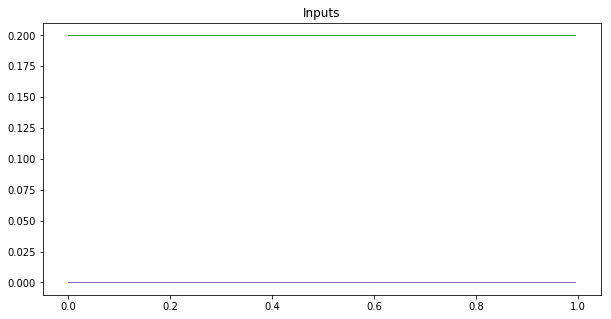

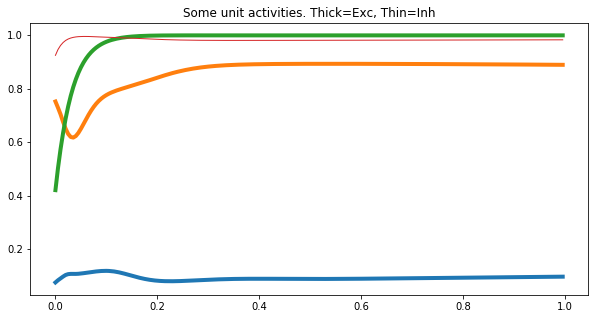

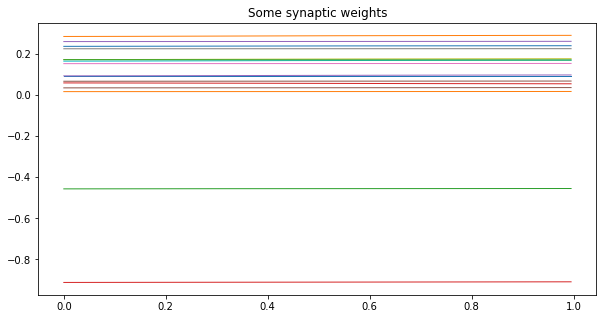

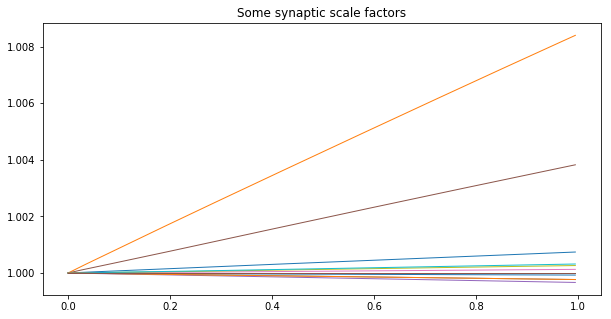

In [5]:
%matplotlib inline
ei_runner.basic_plot()

In [12]:
ei_runner.double_anim(ei_runner.e+ei_runner.x, slider=False, interv=20, nbins=20, thr=0.9, pdf=True)

[153 166   3   2]


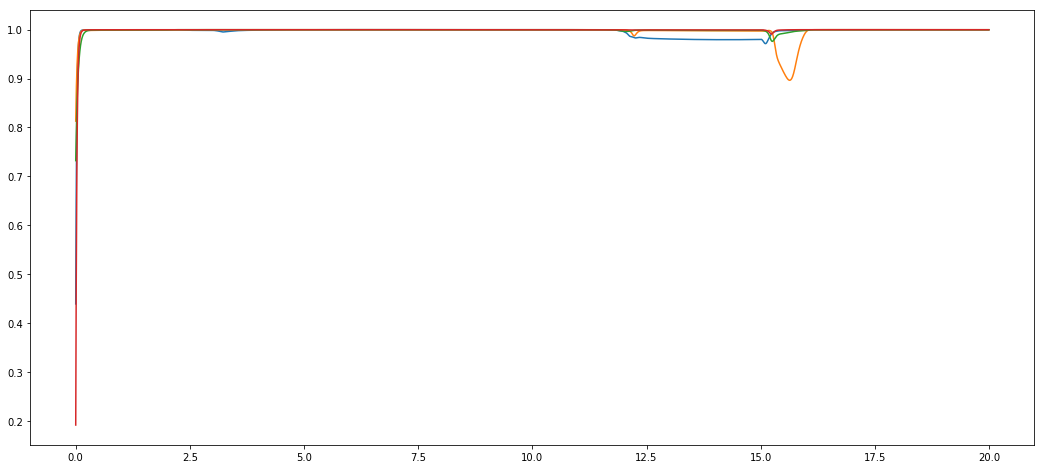

In [8]:
# Plot the highest excitatory unit activities
%matplotlib inline
n_top = 4  # how many units to plot
top_pop = np.array(ei_runner.e)  # population to visualize
top_units = ei_runner.all_activs[top_pop].sum(1).argpartition(-n_top)[-n_top:]
print(top_units)
top_act_fig = plt.figure(figsize=(18,8))
top_acts = ei_runner.all_activs[top_pop[top_units]].transpose()
plt.plot(ei_runner.all_times, top_acts)
plt.show()

[29 55 42]


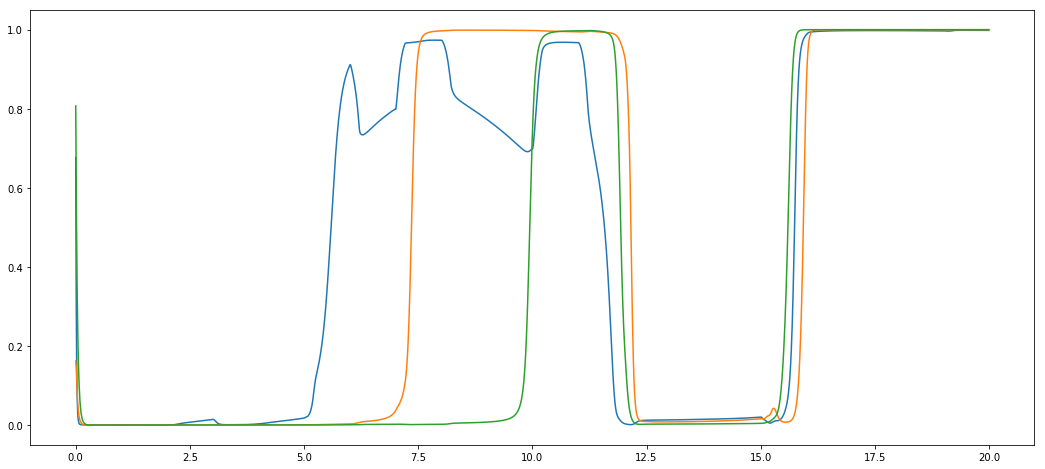

In [9]:
# Plot the lowest excitatory unit activities
n_bottom = 4  # how many units to plot
bottom_pop = np.array(ei_runner.e)  # population to visualize
bottom_units = ei_runner.all_activs[bottom_pop].sum(1).argpartition(n_bottom)[0:n_bottom-1]
print(bottom_units)
bottom_act_fig = plt.figure(figsize=(18,8))
bottom_acts = ei_runner.all_activs[bottom_pop[bottom_units]].transpose()
plt.plot(ei_runner.all_times, bottom_acts)
plt.show()

In [20]:
# Annotations and log
ei_runner.annotate('Redoing the first simulation of this day, this time with the update based on the  ', make_history=False)
ei_runner.annotate('solution of the logistic differential equation for the scale factors.', make_history=False)
ei_runner.annotate('After a bunch of presentations the result was that the network would switch between ', make_history=False)
ei_runner.annotate('episodes where it would approach the exponential distribution, and episodes where ', make_history=False)
ei_runner.annotate('all units would become active.', make_history=False)
ei_runner.annotate('Perhaps this is an issue of parameters. ', make_history=False)
#ei_runner.annotate('The second caveat is that the number of highly activated units can vary a lot between', make_history=False)
#ei_runner.annotate('patterns. This could be a feature rather than a flaw.', make_history=False)
#ei_runner.annotate('', make_history=False)
ei_runner.log(name=log_file,params=False)

In [ ]:
ei_runner.history

In [ ]:
ei_runner.conn_anim(ei_runner.x, ei_runner.e, slider=True, weights=True)

In [ ]:
ei_runner.act_anim(ei_runner.e, 0.9, interv=20, slider=True)

In [ ]:
ei_runner.hist_anim(ei_runner.e, slider=True, nbins=20, pdf=True)

In [ ]:
# Some code to visualize the shape of the learning rule
f = lambda x: np.log( x/(1.-x) )
x = np.linspace(0.005, 0.99, 200)
#plt.plot(x, f(x))
y = np.linspace(0.005, 0.99, 200)
x,y = np.meshgrid(x,y)
k = np.exp(1.)/(1. - np.exp(-1))
#z = 0.1*f(x)*np.exp(y)/(y*(y-1))
z =  k * x * np.exp(y)/(144.*y*(1.-y))
%matplotlib qt5
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm, rcount=60, ccount=60, antialiased=False)
ax.set_xlabel('post rate')
ax.set_ylabel('pre rate')
ax.set_zlabel('ss weight')
plt.show()

In [ ]:
import sys
sys.setrecursionlimit(5000)
ei_runner.save(name="save_test2.pkl")
#ei_runner.save(name="ei_runner_select1.pkl")